<a href="https://colab.research.google.com/github/barant04/Data-Cleaning-Titanic-Dataset/blob/main/Data_Cleaning_and_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Please** use the file **Titanic.tsv**. You can add the Titanic.tsv file to the files folder and run it.

In [ ]:
import pandas as pd # for data processing
import numpy as np # for large numeric operations
import seaborn as sb # for visualizations
import matplotlib.pyplot as plt # for visualizations
from matplotlib.colors import ListedColormap # for visualizations

In [ ]:
data = pd.read_csv('Titanic.tsv',sep='\t')

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,"7,25",NaN,S,Titanic
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,"71,2833",C85,C,Titanic
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,"7,925",NaN,S,Titanic
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,"53,1",C123,S,Titanic
4,5,0,3.0,"Allen, Mr. William Henry",male,35,0,0,373450,"8,05",NaN,S,Titanic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,890,1,1.0,"Behr, Mr. Karl Howell",male,26,0,0,111369,30,C148,C,Titanic
890,891,0,3.0,"Dooley, Mr. Patrick",male,32,0,0,370376,"7,75",NaN,Q,Titanic
891,1000,1,1.0,Mr. Frederick Maxfield Hoyt,male,38,1,0,19943,90,C93,S,Titanic
892,1143,1,3.0,"Sandstrom, Miss. Marguerite Ru&5$$",female,4,1,1,PP 9549,"16,7",G6,S,Titanic


In [ ]:
data.shape

(894, 13)

In [ ]:
data.info() #checking data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  894 non-null    int64  
 1   Survived     894 non-null    int64  
 2   Pclass       894 non-null    float64
 3   Name         894 non-null    object 
 4   Sex          894 non-null    object 
 5   Age          721 non-null    object 
 6   SibSp        894 non-null    int64  
 7   Parch        894 non-null    object 
 8   Ticket       893 non-null    object 
 9   Fare         893 non-null    object 
 10  Cabin        208 non-null    object 
 11  Embarked     892 non-null    object 
 12  ship         894 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 90.9+ KB


Handling missing (NaNs and Blank) values

In [ ]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            173
SibSp            0
Parch            0
Ticket           1
Fare             1
Cabin          686
Embarked         2
ship             0
dtype: int64

In [ ]:
data = data.dropna() # delete rows with missing data

In [ ]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
ship           0
dtype: int64

In [ ]:
data.shape

(188, 13)

  Handling duplicates

In [ ]:
data.drop_duplicates(keep=False, inplace=True)

<ipython-input-10-ec62a0ea1113>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(keep=False, inplace=True)


In [ ]:
data.shape

(183, 13)

Checking Outliers

In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'ship'],
      dtype='object')

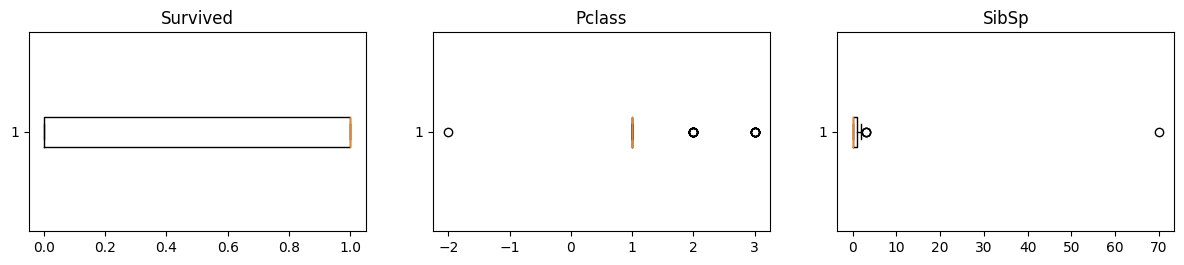

In [ ]:
# Create a dictionary of integer/float columns.
col_dict = {'Survived':1,'Pclass':2,'SibSp':3}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,15))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(data[variable],whis=1.5,vert=False)
                     plt.title(variable)

plt.show()

Handling wrong/improper values


In [ ]:
data['Age'].value_counts()

36      11
24       9
19       6
35       6
38       5
        ..
36,5     1
32,5     1
71       1
.9       1
26       1
Name: Age, Length: 64, dtype: int64

In [ ]:
# Convert incorrectly formatted age values to float
data['Age'] = data['Age'].apply(lambda x: float(x.replace('.','')) if isinstance (x, str) and'.'in x else x)

<ipython-input-15-ef7ad430b98a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'] = data['Age'].apply(lambda x: float(x.replace('.','')) if isinstance (x, str) and'.'in x else x)


In [ ]:
data['Age'].value_counts()

36      11
24       9
19       6
35       6
38       5
        ..
36,5     1
32,5     1
71       1
9.0      1
26       1
Name: Age, Length: 64, dtype: int64

In [ ]:
print(data.loc[data['Sex'].isin(['male', 'female']), 'Sex'])

1      female
3      female
6        male
11     female
27       male
        ...  
872      male
879    female
889      male
891      male
892    female
Name: Sex, Length: 179, dtype: object


In [ ]:
data['Sex'].value_counts()

male       94
female     85
malef       1
femmale     1
feemale     1
F           1
Name: Sex, dtype: int64

In [ ]:
data['Sex'] = data['Sex'].replace('malef', 'male')
data['Sex'] = data['Sex'].replace('femmale', 'female')
data['Sex'] = data['Sex'].replace('feemale', 'female')
data['Sex'] = data['Sex'].replace('F', 'female')

<ipython-input-19-d720e8088066>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex'] = data['Sex'].replace('malef', 'male')
<ipython-input-19-d720e8088066>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex'] = data['Sex'].replace('femmale', 'female')
<ipython-input-19-d720e8088066>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [ ]:
data['Sex'].value_counts()

male      95
female    88
Name: Sex, dtype: int64

In [ ]:
data.to_csv('titanic_cleaned.csv', index=False)